### 문제 정의 (목표 설정)
- 8천여개의 버섯 데이터를 활용해서 독버섯 / 식용버섯인지 분류 해보자.
- 결정 트리모델을 시각화 해보자.
- 정답을 맞추는 부분에서 많은 역할을 하는 특성을 확인해보자. 

In [2]:
# 필요한 라이브러리 import 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 데이터 수집 (데이터 로드)
- 제공된 mushroom.csv 파일 읽어오기

In [3]:
data=pd.read_csv('./data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# info() 데이터의 간략한 정보를 확인하는 함수 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# 기술 통계 확인 
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 데이터 전처리
- 결측치 없었다. - 학습용 데이터이기 때문에 이미 정제된 데이터 제공
- 전처리 Pass!

### 탐색적 데이터 분석 (EDA)

In [6]:
# 신규 라이브러리 등장! 
# matplotlib 라이브러리는 시각화의 기본! 
# seaborn 라이브러리를 이용해서 깔끔한 그래프를 그려보고 기능을 추가해보자! 
import seaborn as sns

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

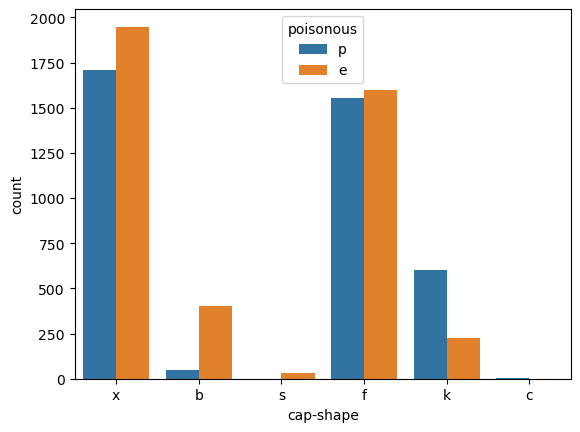

In [7]:
# countplt : 막대그래프 / matplotlib => plt.bar
sns.countplot(data=data, # 데이터 프레임 넣어주는 곳
             x='cap-shape', # x축에 데이터를 넣어주는 곳
             hue='poisonous' # 해당하는 컬럼의 값들 개수가 bar 차트로 출력되게 만드는 부분 + 범례
             )